https://www.kaggle.com/datasets/tawfikelmetwally/census-income-dataset?resource=download&select=adult.csv

#load data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/tempat datasets/Income Classification/adult.csv')
df_train.head()

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/tempat datasets/Income Classification/adult.test.csv')
df_test

,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0.1,40,United-States,<=50K.
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16276,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16277,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16278,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


karena df_test tidak punya nama kolom, oleh karena itu kami gabungnkan kedua dataset tersebut

In [ ]:
columns=df_train.columns
df_test.columns=columns

df_concat = pd.concat([df_train, df_test], axis= 0)

In [ ]:
df_concat.shape

(48841, 15)

#Data Preprocessing

In [ ]:
df_cp = df_concat.copy()

In [ ]:
#lakukan preprocessing data concat
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48841 entries, 0 to 16279
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48841 non-null  int64 
 1   Workclass       48841 non-null  object
 2   Final Weight    48841 non-null  int64 
 3   Education       48841 non-null  object
 4   EducationNum    48841 non-null  int64 
 5   Marital Status  48841 non-null  object
 6   Occupation      48841 non-null  object
 7   Relationship    48841 non-null  object
 8   Race            48841 non-null  object
 9   Gender          48841 non-null  object
 10  Capital Gain    48841 non-null  int64 
 11  capital loss    48841 non-null  int64 
 12  Hours per Week  48841 non-null  int64 
 13  Native Country  48841 non-null  object
 14  Income          48841 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [ ]:
#cek NULL
df_cp.isnull().sum()

,0
Age,0
Workclass,0
Final Weight,0
Education,0
EducationNum,0
Marital Status,0
Occupation,0
Relationship,0
Race,0
Gender,0


In [ ]:
#cek duplikat
df_cp.duplicated().sum()

29

In [ ]:
#drop duplikat
df_cp.drop_duplicates(inplace=True)

In [ ]:
df_cp.describe(include = 'object')

,Workclass,Education,Marital Status,Occupation,Relationship,Race,Gender,Native Country,Income
count,48812,48812,48812,48812,48812,48812,48812,48812,48812
unique,9,16,7,15,6,5,2,42,4
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33878,15777,22372,6167,19709,41736,32630,43809,24698


In [ ]:
df_cp['Workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [ ]:
#membersihkan ' ?'
df_cp[['Workclass', 'Native Country', 'Occupation']] = df_cp[['Workclass', 'Native Country', 'Occupation']].replace(' ?', np.nan)
#menghilangkan spasi
for col in ['Workclass', 'Education', 'Marital Status', 'Occupation', 'Relationship', 'Race', 'Gender', 'Native Country', 'Income']:
    df_cp[col] = df_cp[col].str.strip()

In [ ]:
#cek NULL
df_cp.isnull().sum()

,0
Age,0
Workclass,2799
Final Weight,0
Education,0
EducationNum,0
Marital Status,0
Occupation,2809
Relationship,0
Race,0
Gender,0


In [ ]:
# Menghapus baris dengan nilai NaN pada kolom tertentu
df_cp = df_cp.dropna(subset=['Workclass', 'Native Country', 'Occupation'])

In [ ]:
#cek NULL
df_cp.isnull().sum()

,0
Age,0
Workclass,0
Final Weight,0
Education,0
EducationNum,0
Marital Status,0
Occupation,0
Relationship,0
Race,0
Gender,0


In [ ]:
# Mengganti nama kolom
df_cp.rename(columns={'capital loss': 'Capital Loss'}, inplace=True)

In [ ]:
df_cp['Income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [ ]:
#memperbaiki income
df_cp['Income'] = df_cp['Income'].str.replace('.', '')

In [ ]:
# Melihat perbandingan persentase 0 dengan yang tidak di kolom Capital Loss dan Capital Gain
for col in ['Capital Loss', 'Capital Gain']:
  zero_count = (df_cp[col] == 0).sum()
  non_zero_count = (df_cp[col] != 0).sum()
  total_count = len(df_cp[col])

  percentage_zero = (zero_count / total_count) * 100
  percentage_non_zero = (non_zero_count / total_count) * 100

  print(f"Kolom {col}:")
  print(f"Persentase nilai 0: {percentage_zero:.2f}%")
  print(f"Persentase nilai bukan 0: {percentage_non_zero:.2f}%")
  print("-" * 20)


Kolom Capital Loss:
Persentase nilai 0: 95.26%
Persentase nilai bukan 0: 4.74%
--------------------
Kolom Capital Gain:
Persentase nilai 0: 91.61%
Persentase nilai bukan 0: 8.39%
--------------------


karena 0 lebih dominan di kedua kolom tersebut yang jika tidak dihilangkan dapat mengurangi akurasi dari model, oleh karena itu lebih baik didrop

In [ ]:
#drop kolom capital loss dan capital gain
df_cp = df_cp.drop(['Capital Loss', 'Capital Gain'], axis=1)

#EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45193 entries, 0 to 16279
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             45193 non-null  int64 
 1   Workclass       45193 non-null  object
 2   Final Weight    45193 non-null  int64 
 3   Education       45193 non-null  object
 4   EducationNum    45193 non-null  int64 
 5   Marital Status  45193 non-null  object
 6   Occupation      45193 non-null  object
 7   Relationship    45193 non-null  object
 8   Race            45193 non-null  object
 9   Gender          45193 non-null  object
 10  Hours per Week  45193 non-null  int64 
 11  Native Country  45193 non-null  object
 12  Income          45193 non-null  object
dtypes: int64(4), object(9)
memory usage: 4.8+ MB


In [ ]:
num_col = ['Age', 'Final Weight', 'EducationNum', 'Hours per Week' ]
cat_col = ['Workclass', 'Education', 'Marital Status', 'Occupation', 'Relationship', 'Race',	'Gender',	'Native Country',	'Income']

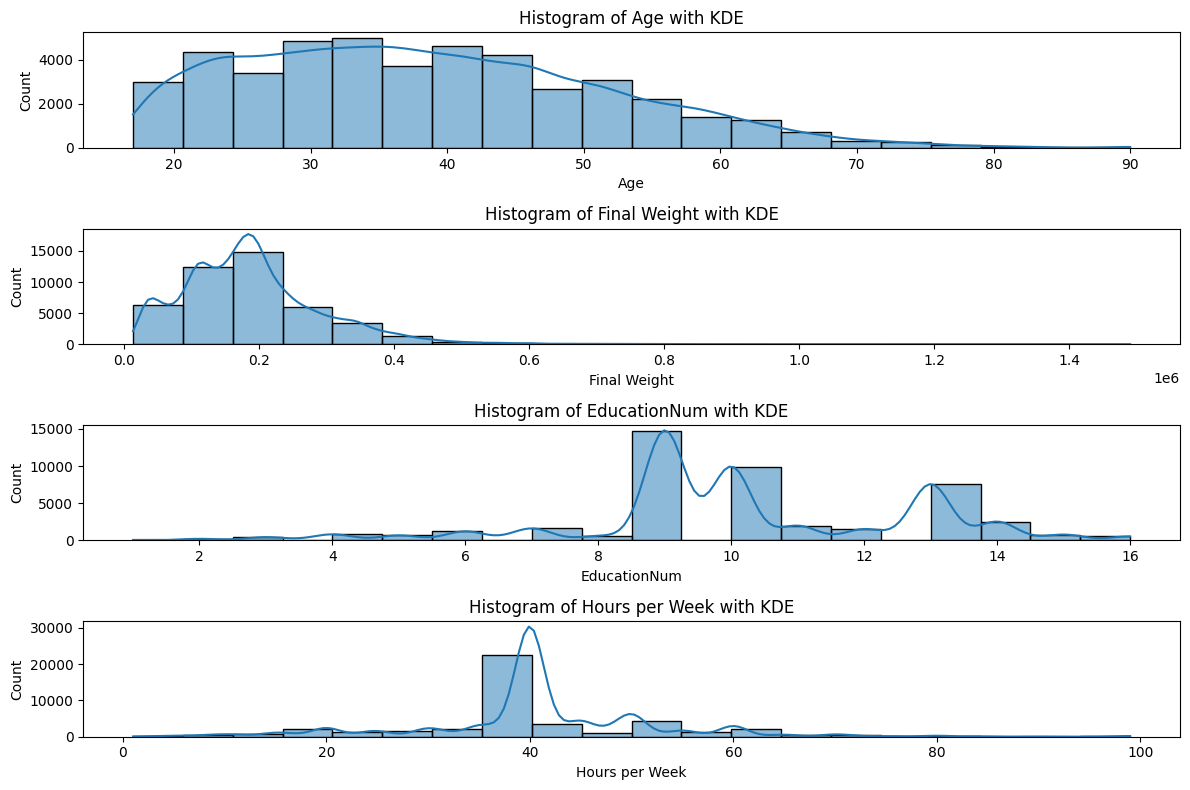

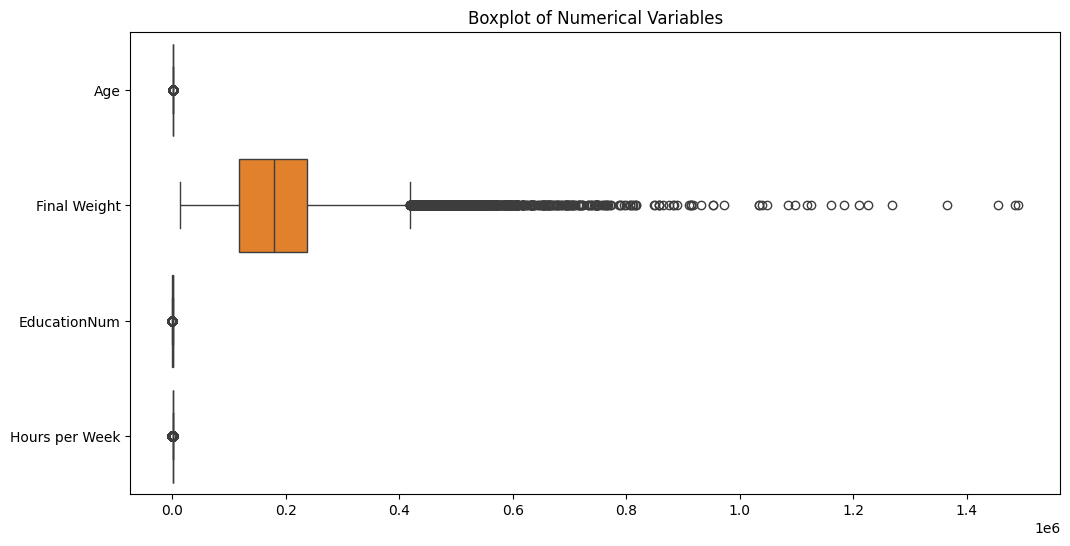

In [ ]:
#Univariate Analysis

# Histogram untuk memvisualisasikan skewness
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_col, 1):
    plt.subplot(len(num_col), 1, i)
    sns.histplot(df_cp[col], bins=20, kde=True)
    plt.title(f'Histogram of {col} with KDE')
plt.tight_layout()
plt.show()

# Boxplot untuk memvisualisasikan skewness
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cp[num_col], orient='h')
plt.title('Boxplot of Numerical Variables')
plt.show()


Histogram Final Weight menunjukkan distribusi yang jelas miring ke kanan (right-skewed). Mayoritas data terkonsentrasi di sisi kiri, dengan ekor panjang ke arah kanan. oleh karena itu, kami memilih untuk mendrop kolom final weight karena skewness yang signifikan ini menunjukkan bahwa data tidak terdistribusi normal Ekor panjang ke kanan mengindikasikan adanya nilai-nilai ekstrem atau outlier. Ini bisa mempengaruhi analisis secara tidak proporsional.

juga, final weight memiliki rentang nilai yang sangat lebar (dari 0 hingga 1.4 juta) membuat interpretasi dan perbandingan antar sampel menjadi sulit.

In [ ]:
# melihat jumlah outlier dari setiap kolom numerikal dengan menggunakan IQR
outlier_counts = {}

# Menghitung IQR dan jumlah outlier untuk setiap kolom numerik
for col in num_col:
    Q1 = df_cp[col].quantile(0.25)
    Q3 = df_cp[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Hitung jumlah outlier
    outlier_count = df_cp[(df_cp[col] < lower_bound) | (df_cp[col] > upper_bound)].shape[0]

    # Simpan hasil ke dalam dictionary
    outlier_counts[col] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outlier Count': outlier_count
    }

# Mengkonversi hasil ke dalam DataFrame untuk lebih mudah dibaca
outlier_summary = pd.DataFrame(outlier_counts).T
print(outlier_summary)

                      Q1        Q3       IQR  Lower Bound  Upper Bound  \
Age                 28.0      47.0      19.0         -0.5         75.5   
Final Weight    117392.0  237903.0  120511.0     -63374.5     418669.5   
EducationNum         9.0      13.0       4.0          3.0         19.0   
Hours per Week      40.0      45.0       5.0         32.5         52.5   

                Outlier Count  
Age                     268.0  
Final Weight           1332.0  
EducationNum            291.0  
Hours per Week        11892.0  


karena age dan educationNum memiliki outlier yang terbilang sedikit dibandingkan jumlah datanya, oleh karena itu kami memilih untuk melakukan drop data yang outliernya

In [ ]:
#drop kolom final weight
df_cp = df_cp.drop(['Final Weight'], axis=1)

In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menghapus outlier
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Menghapus outlier dari kolom 'Age'
df_cp = remove_outliers_iqr(df_cp, 'Age')

# Menghapus outlier dari kolom 'EducationNum'
df_cp = remove_outliers_iqr(df_cp, 'EducationNum')

# Menampilkan DataFrame setelah menghapus outlier
print(df_cp.shape)

(44640, 12)


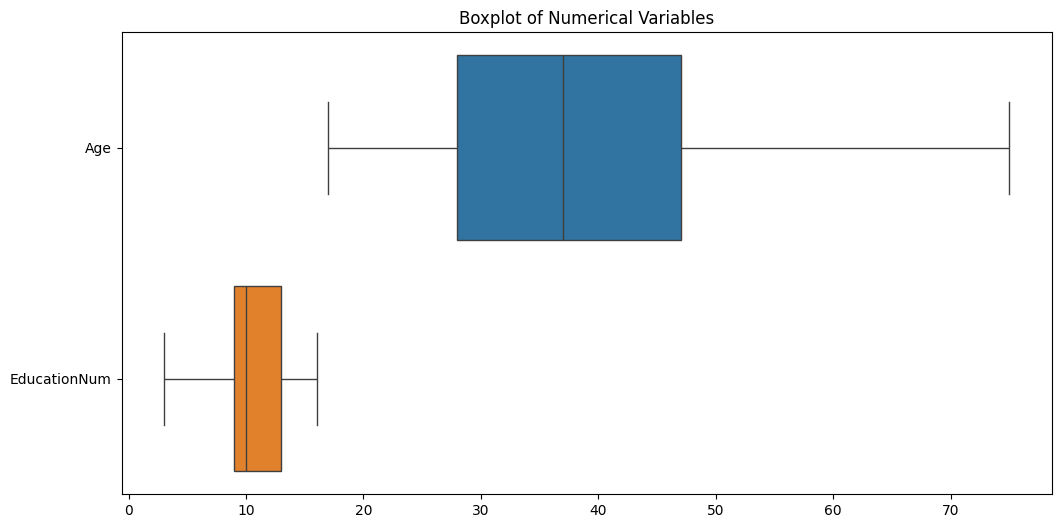

In [ ]:
# Boxplot untuk memvisualisasikan setelah di drop
plt.figure(figsize=(12, 6))

# Select the columns correctly using a list
sns.boxplot(data=df_cp[['Age', 'EducationNum']], orient='h')

plt.title('Boxplot of Numerical Variables')
plt.show()

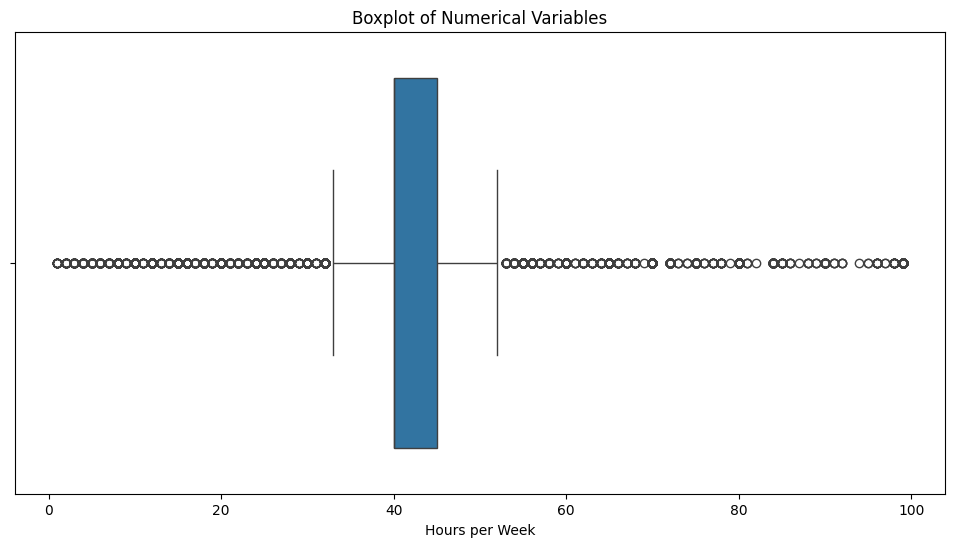

In [ ]:
# Boxplot untuk memvisualisasikan sebelum di winsorize
plt.figure(figsize=(12, 6))

# Select the columns correctly using a list
sns.boxplot(data=df_cp['Hours per Week'], orient='h')

plt.title('Boxplot of Numerical Variables')
plt.show()

In [ ]:
import pandas as pd
from scipy.stats.mstats import winsorize

# Melakukan winsorization pada kolom 'Hours per Week', 'Age', dan 'EducationNum'
for col in ['Hours per Week', 'Age', 'EducationNum']:
    df_cp[col] = winsorize(df_cp[col], limits=[0.05, 0.05])

# Menampilkan data setelah winsorization
print(df_cp[['Hours per Week', 'Age', 'EducationNum']].describe())  # Menampilkan deskripsi statistik setelah winsorization

       Hours per Week           Age  EducationNum
count    45193.000000  45193.000000  45193.000000
mean        40.776957     38.312261     10.186135
std          9.778635     12.344870      2.221275
min         20.000000     20.000000      6.000000
25%         40.000000     28.000000      9.000000
50%         40.000000     37.000000     10.000000
75%         45.000000     47.000000     13.000000
max         60.000000     62.000000     14.000000


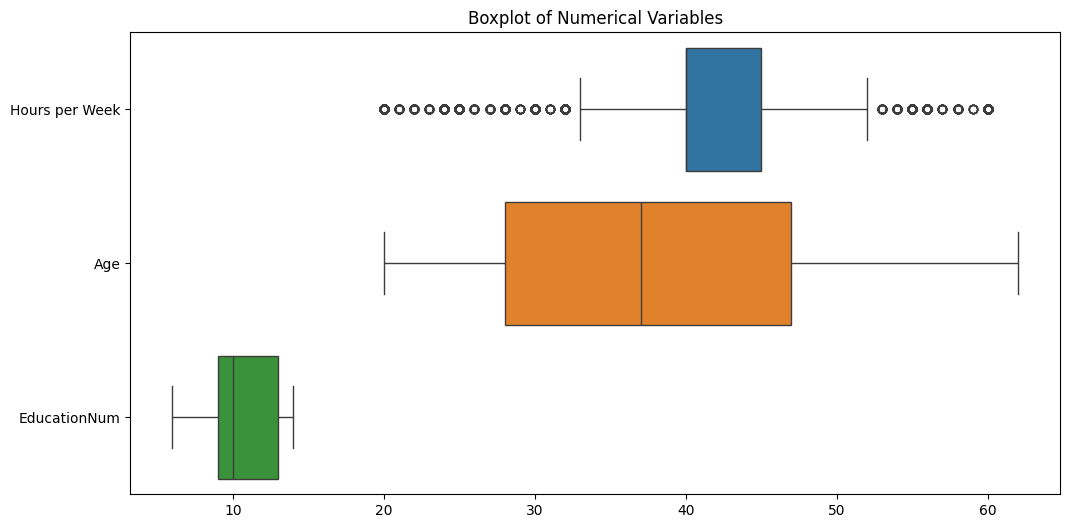

In [ ]:
# Boxplot untuk memvisualisasikan setelah di lakukan winsorize
plt.figure(figsize=(12, 6))

# Select the columns correctly using a list
sns.boxplot(data=df_cp[['Hours per Week', 'Age', 'EducationNum']], orient='h')

plt.title('Boxplot of Numerical Variables')
plt.show()

In [ ]:
#update num_col
num_col = ['Age', 'EducationNum', 'Hours per Week']

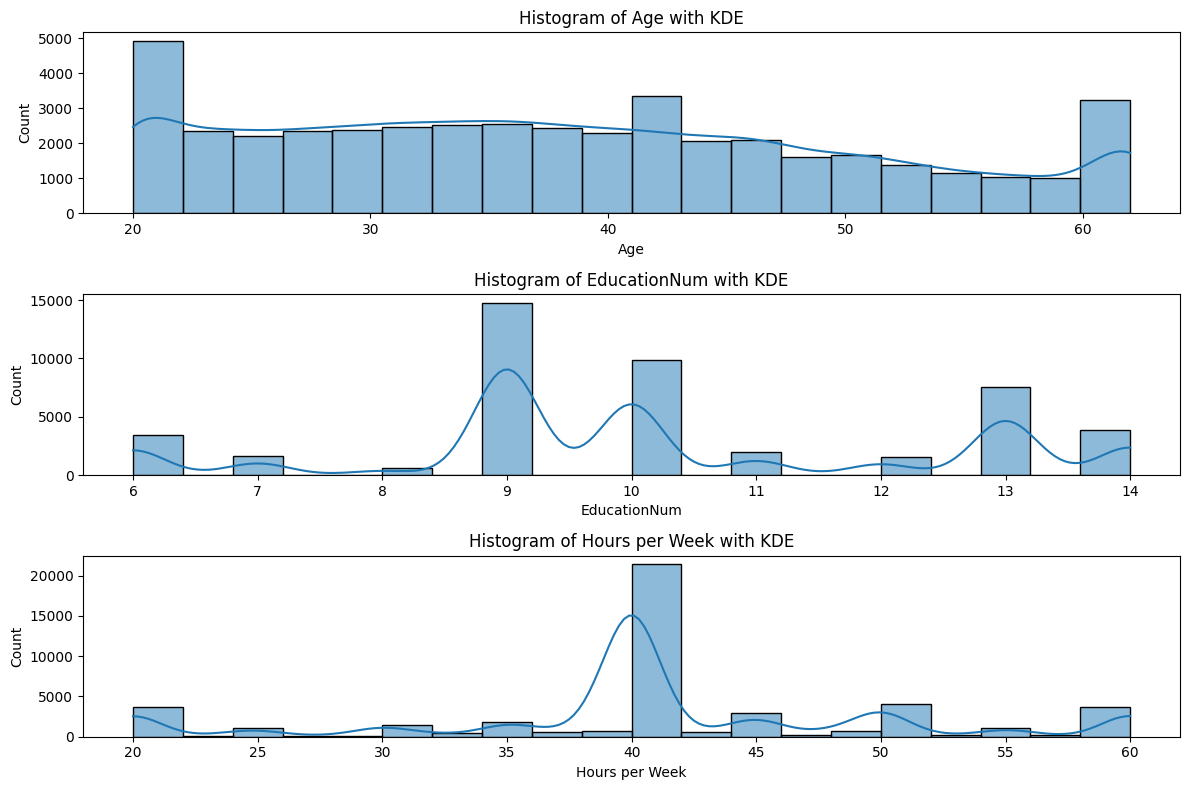

In [ ]:
# Histogram untuk memvisualisasikan skewness
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_col, 1):
    plt.subplot(len(num_col), 1, i)
    sns.histplot(df_cp[col], bins=20, kde=True)
    plt.title(f'Histogram of {col} with KDE')
plt.tight_layout()
plt.show()

Dengan melakukan winsorization, kita dapat membatasi pengaruh nilai ekstrem dengan menggantinya dengan nilai yang lebih mendekati batasan yang wajar, tanpa menghapus data tersebut. Ini membantu menjaga integritas dataset dan memungkinkan kita untuk tetap mempertimbangkan semua informasi yang ada, sekaligus meningkatkan stabilitas analisis. Dengan demikian, winsorization memberikan pendekatan yang seimbang antara menjaga data asli dan mengurangi dampak outlier yang tidak representatif.








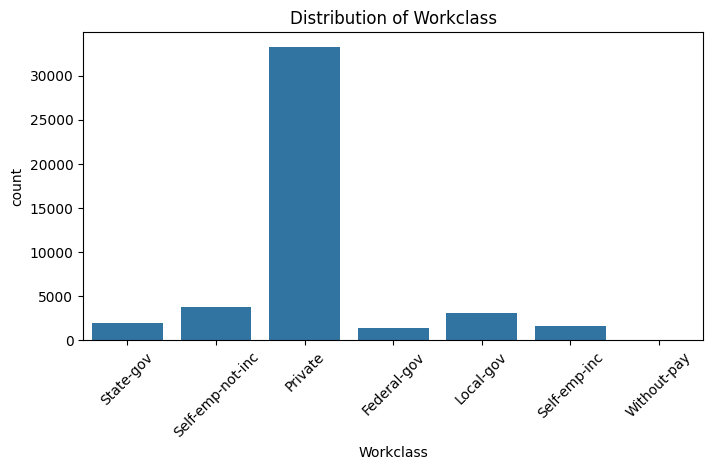

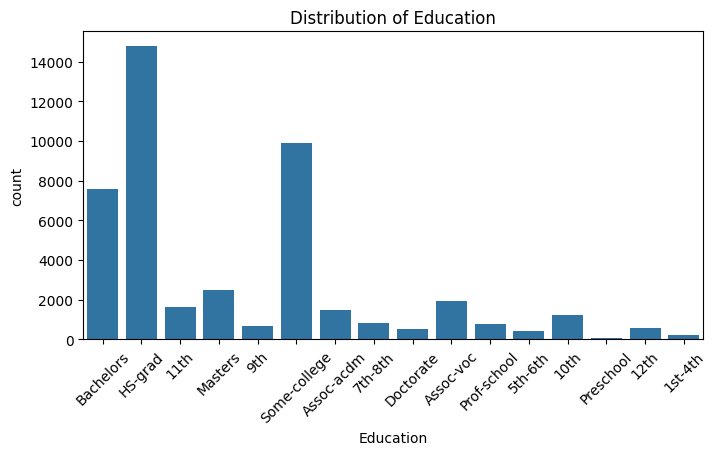

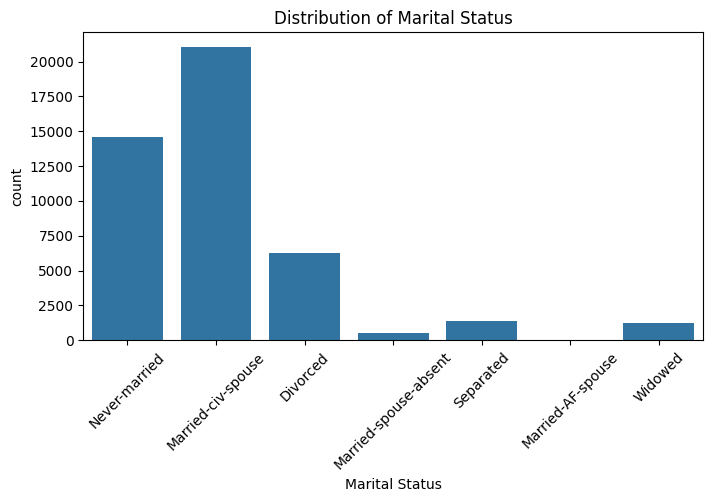

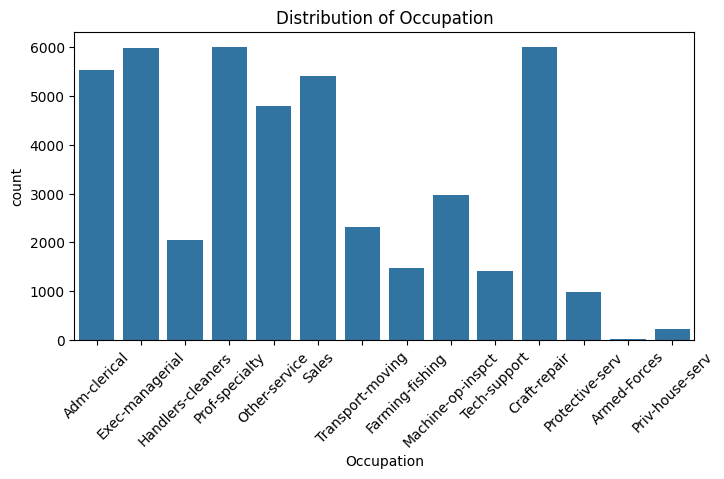

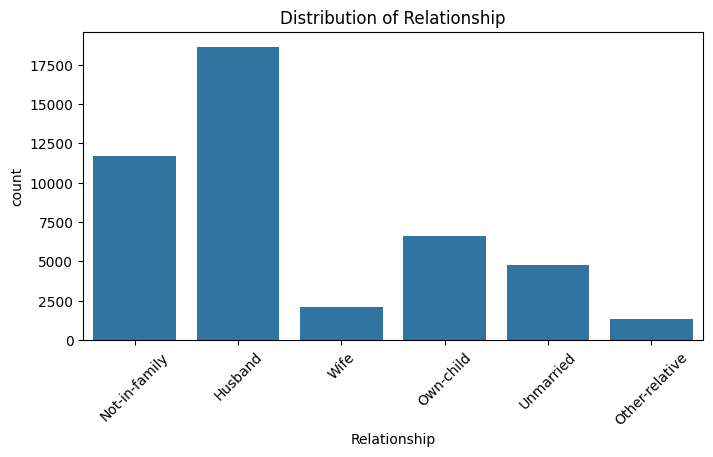

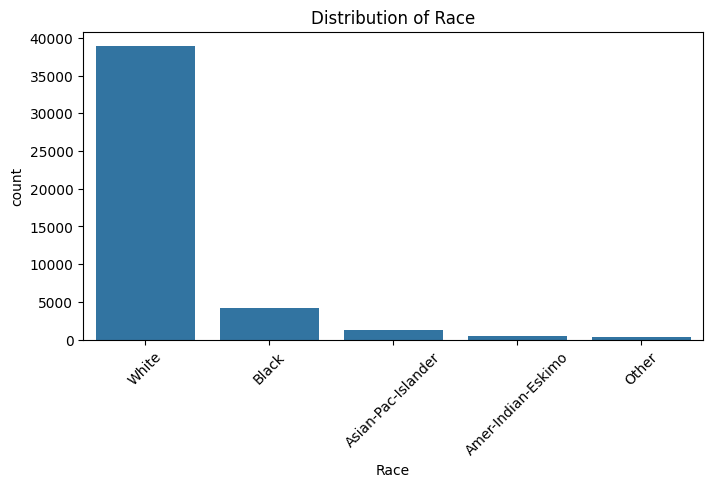

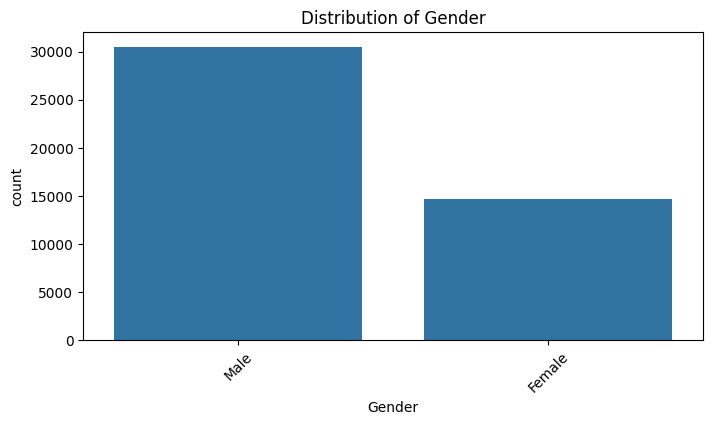

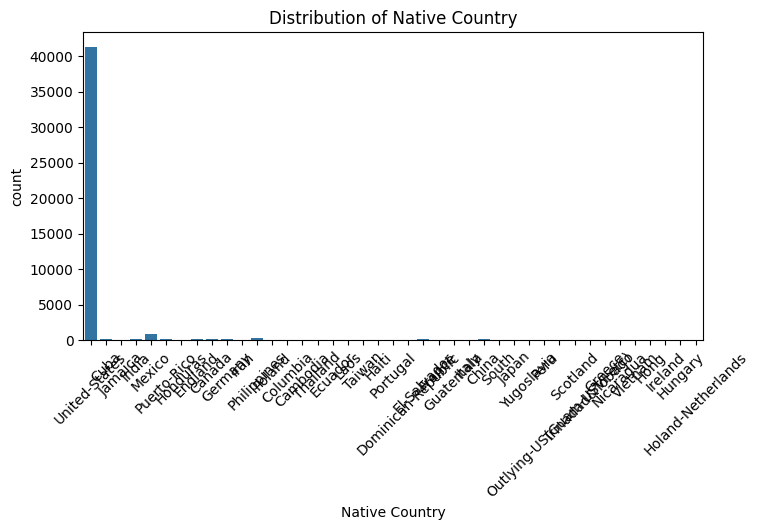

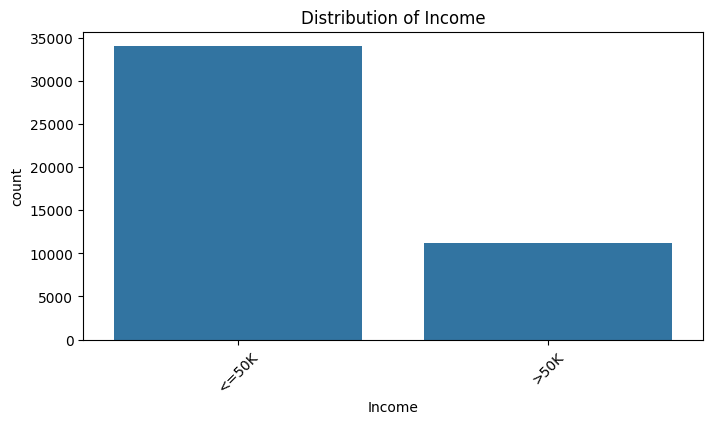

In [ ]:
#univariate variabel kategorikal
for col in cat_col:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_cp, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

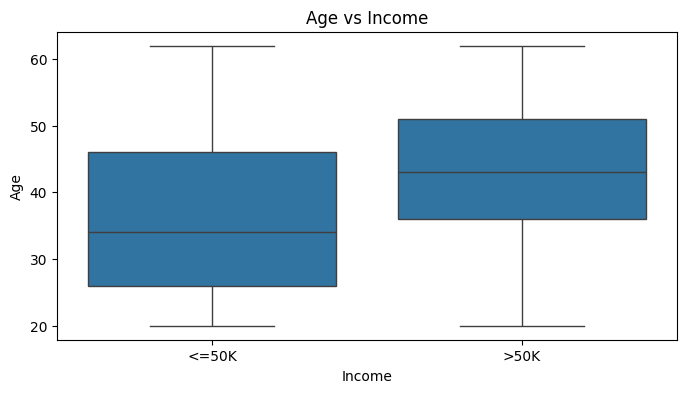

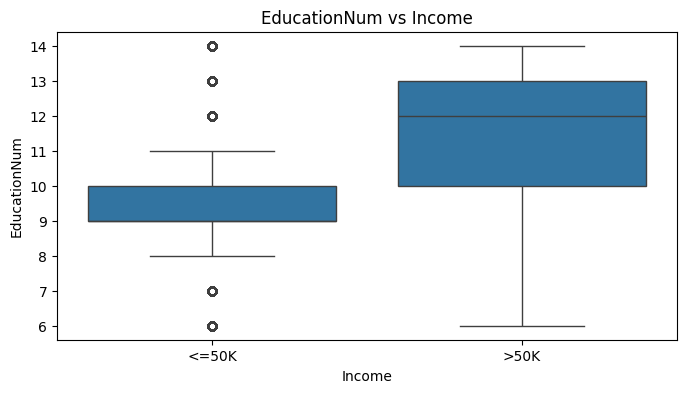

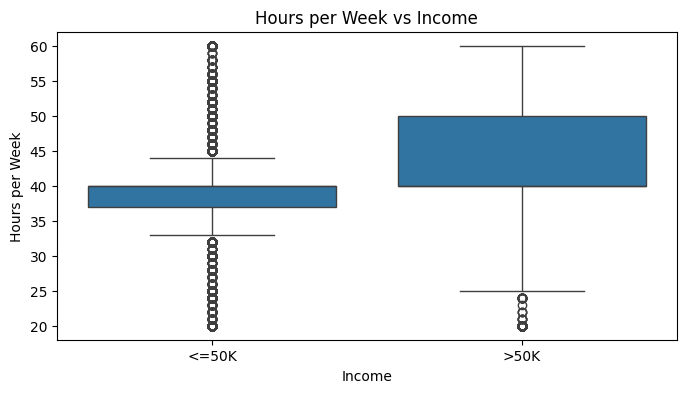

In [ ]:
#bivariate numerik vs income
for col in num_col:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Income', y=col, data=df_cp)
    plt.title(f'{col} vs Income')
    plt.show()

In [ ]:
#melakukan feature engineering untuk kolom hours per work
df_cp['Hours per Week'].unique()

array([40, 20, 45, 50, 60, 30, 35, 52, 44, 25, 43, 38, 55, 48, 58, 32, 22,
       56, 41, 28, 36, 24, 46, 42, 34, 33, 54, 47, 37, 21, 26, 53, 39, 59,
       57, 49, 27, 31, 51, 23, 29])

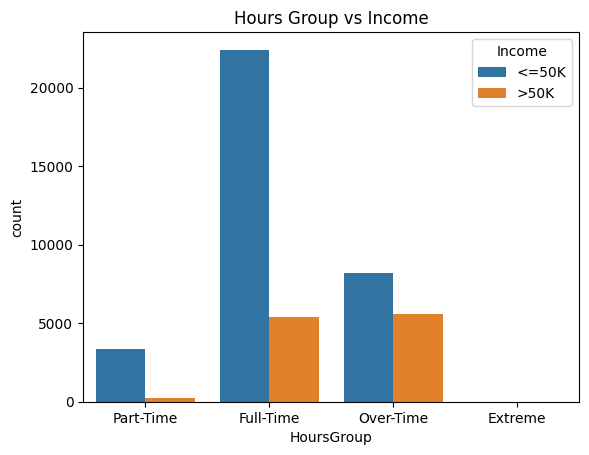

In [ ]:
#feature engineering untuk kolom hours per week dengan pembagian :
# Membuat kategori jam kerja
df_cp['HoursGroup'] = pd.cut(df_cp['Hours per Week'], bins=[0, 20, 40, 60, 100], labels=['Part-Time', 'Full-Time', 'Over-Time', 'Extreme'])

# Visualisasi HoursGroup
sns.countplot(x='HoursGroup', hue='Income', data=df_cp)
plt.title('Hours Group vs Income')
plt.show()

In [ ]:
#drop kolom hours per week karena sudah diganti dengan hoursgroup

#drop kolom hours per week
df_cp = df_cp.drop(['Hours per Week'], axis=1)

In [ ]:
# Menghitung persentase setiap nilai unik di kolom 'Native Country'
native_country_counts = df_cp['Native Country'].value_counts(normalize=True) * 100

# Menampilkan persentase
print(native_country_counts)

Native Country
United-States                 91.317239
Mexico                         1.989246
Philippines                    0.626203
Germany                        0.427057
Puerto-Rico                    0.387228
Canada                         0.360675
El-Salvador                    0.325272
India                          0.325272
Cuba                           0.294293
England                        0.263315
China                          0.250039
Jamaica                        0.227911
South                          0.223486
Italy                          0.221273
Dominican-Republic             0.214635
Japan                          0.196933
Guatemala                      0.185869
Vietnam                        0.183657
Columbia                       0.181444
Poland                         0.179231
Haiti                          0.152679
Portugal                       0.137189
Iran                           0.123913
Taiwan                         0.121700
Greece                   

Kolom "Native Country" di-drop karena distribusinya sangat tidak seimbang, dengan lebih dari 91% data berasal dari United-States, sementara negara lain hanya menyumbang persentase kecil

In [ ]:
#men drop kolom native country

df_cp = df_cp.drop(['Native Country'], axis=1)

In [ ]:
df_cp

,Age,Workclass,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Income,HoursGroup
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,<=50K,Full-Time
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,<=50K,Part-Time
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,<=50K,Full-Time
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,<=50K,Full-Time
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,<=50K,Full-Time
...,...,...,...,...,...,...,...,...,...,...,...
16274,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,<=50K,Full-Time
16275,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,<=50K,Full-Time
16277,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,<=50K,Over-Time
16278,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,<=50K,Full-Time


<ipython-input-46-640d4013e4d9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot1= sns.countplot(data=df_cp, x='Education', order=order1, palette = r_color(num=1,seed=0))
<ipython-input-46-640d4013e4d9>:20: UserWarning: 
The palette list has fewer values (1) than needed (16) and will cycle, which may produce an uninterpretable plot.
  plot1= sns.countplot(data=df_cp, x='Education', order=order1, palette = r_color(num=1,seed=0))
<ipython-input-46-640d4013e4d9>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot2= sns.countplot(data=df_cp, x='EducationNum', order=order2, palette = r_color(num=1,seed=42))
<ipython-input-46-640d4013e4d9>:25: UserWarning: 
The palette list has fewer values (1) than needed (9)

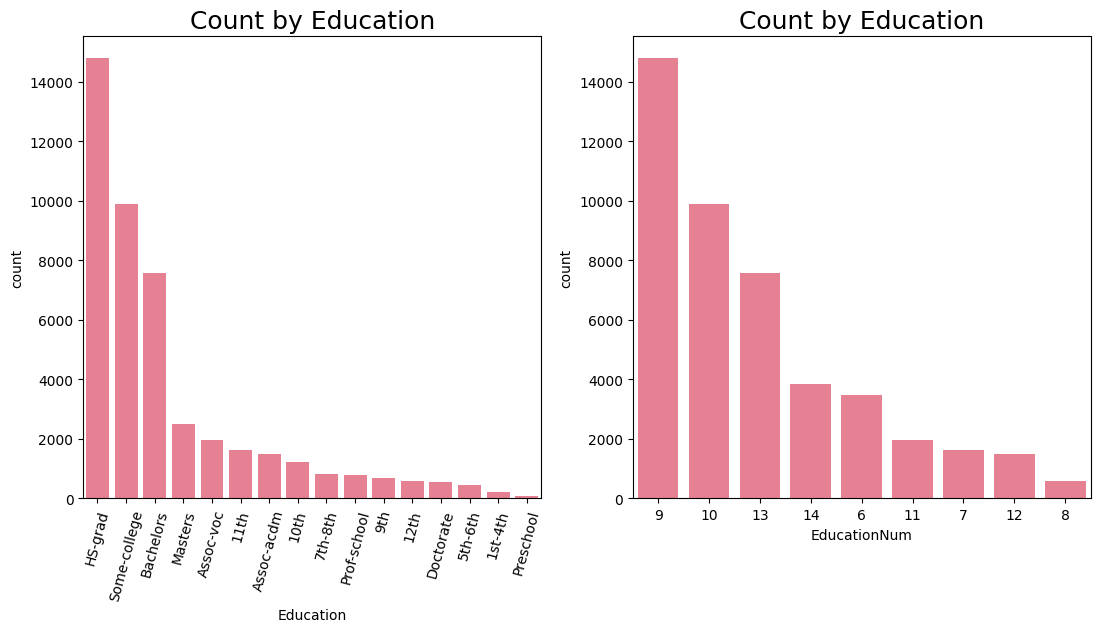

In [ ]:
#melihat visualisasi antara educationNum dan education
Education_data=df_cp['Education'].value_counts()
order1= list(Education_data.index)

EducationNum_data=df_cp['EducationNum'].value_counts()
order2= list(EducationNum_data.index)

import seaborn as sns
import random

def r_color(num=1, seed=0):
    random.seed(seed)
    colors = sns.color_palette("husl", num)
    return colors

plt.figure(figsize=(13,6))

# Plot the count bar plot
plt.subplot(1,2,1)
plot1= sns.countplot(data=df_cp, x='Education', order=order1, palette = r_color(num=1,seed=0))
plt.title('Count by Education', fontsize=18)
plt.xticks(rotation=75);

plt.subplot(1,2,2)
plot2= sns.countplot(data=df_cp, x='EducationNum', order=order2, palette = r_color(num=1,seed=42))
plt.title('Count by Education', fontsize=18);

jika dilihat dari gambar ini bahwa kolom education merepresentasikan EducationNum. oleh karena itu akan di drop kolom education

In [ ]:
#men drop kolom education
df_cp = df_cp.drop(['Education'], axis=1)

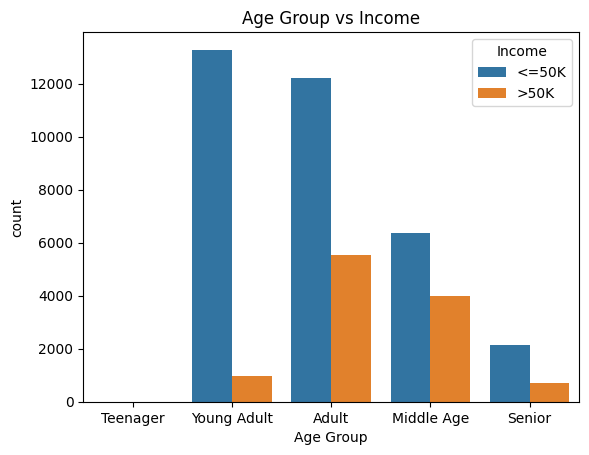

In [ ]:
#Kelompokkan usia menjadi kategori (muda, dewasa, senior) untuk melihat tren penghasilan di kelompok usia tertentu
# 18<=age : teenager, 18<age<=30 : young adult, 30<age<=45 : adult, 45<age<=60 : middle age, 60<age<=100 : senior
# Membuat kategori usia
df_cp['Age Group'] = pd.cut(df_cp['Age'], bins=[0, 18, 30, 45, 60, 100], labels=['Teenager', 'Young Adult', 'Adult', 'Middle Age', 'Senior'])

# Visualisasi AgeGroup
sns.countplot(x='Age Group', hue='Income', data=df_cp)
plt.title('Age Group vs Income')
plt.show()

In [ ]:
#melakukan drop age karena agar pembagian kelasnya lebih jelas dari hasil feature engineering
df_cp = df_cp.drop('Age', axis = 1)

In [ ]:
df_cp['EducationNum'].unique()

array([13,  9,  7, 14,  6, 10, 12, 11,  8])

In [ ]:
df_cp

,Workclass,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Income,HoursGroup,Age Group
0,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,<=50K,Full-Time,Adult
1,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,<=50K,Part-Time,Middle Age
2,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,<=50K,Full-Time,Adult
3,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,<=50K,Full-Time,Middle Age
4,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,<=50K,Full-Time,Young Adult
...,...,...,...,...,...,...,...,...,...,...
16274,Private,13,Never-married,Prof-specialty,Own-child,White,Male,<=50K,Full-Time,Adult
16275,Private,13,Divorced,Prof-specialty,Not-in-family,White,Female,<=50K,Full-Time,Adult
16277,Private,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,<=50K,Over-Time,Adult
16278,Private,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,<=50K,Full-Time,Adult


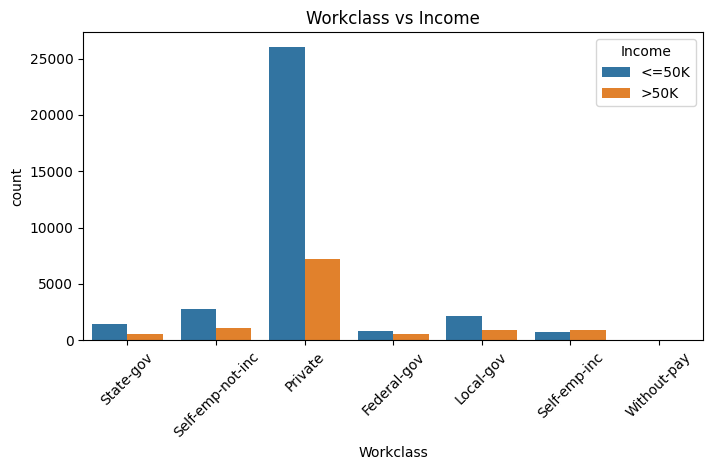

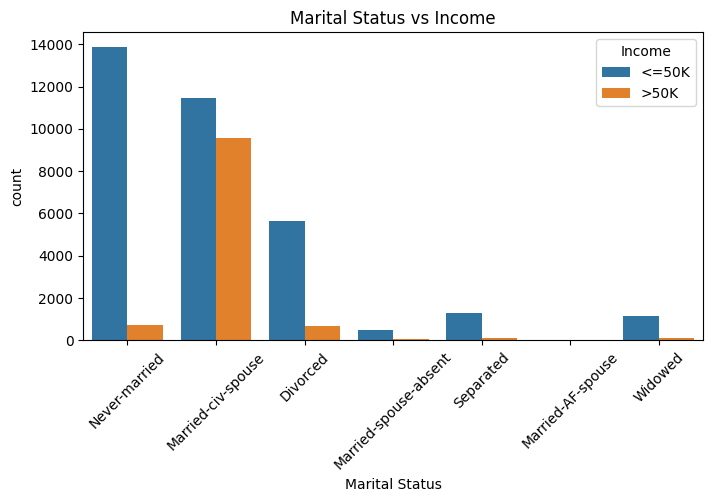

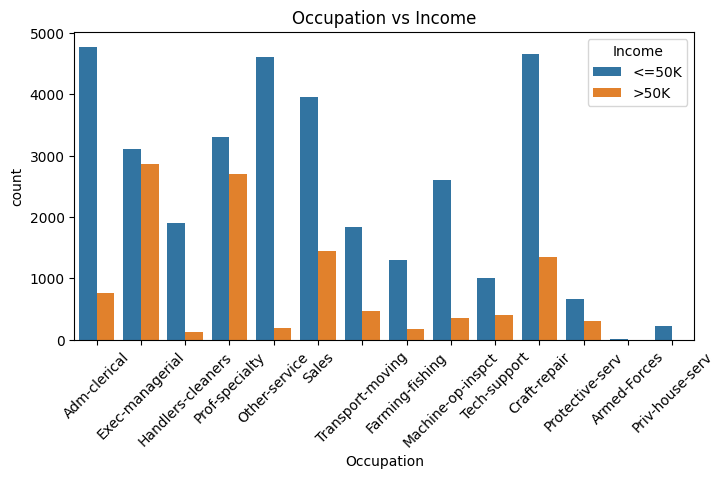

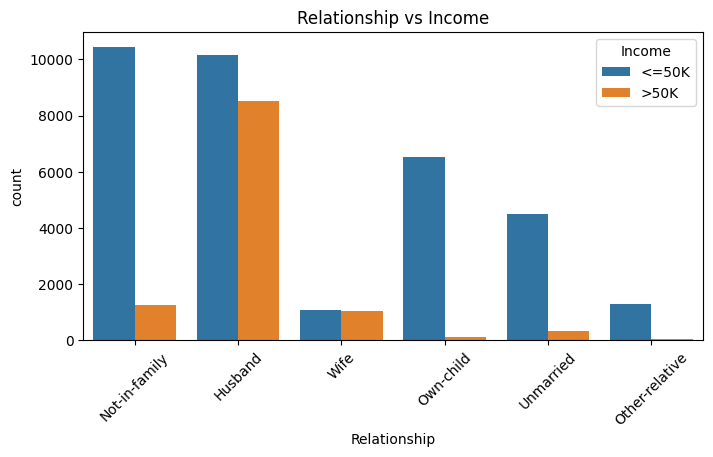

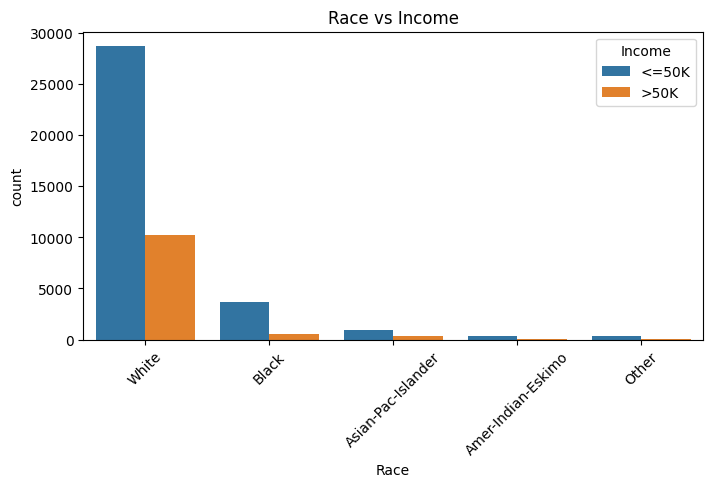

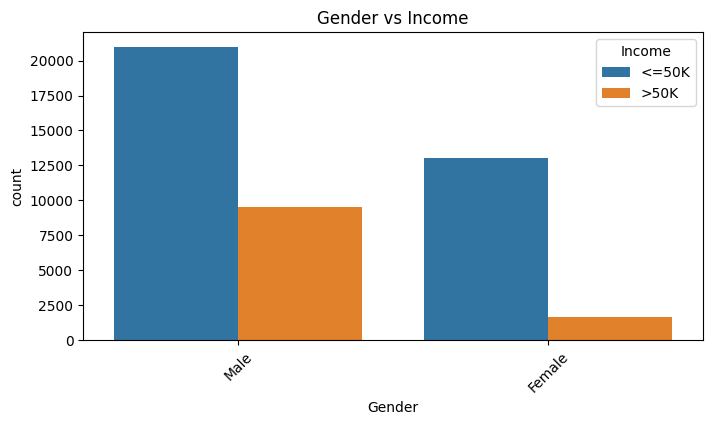

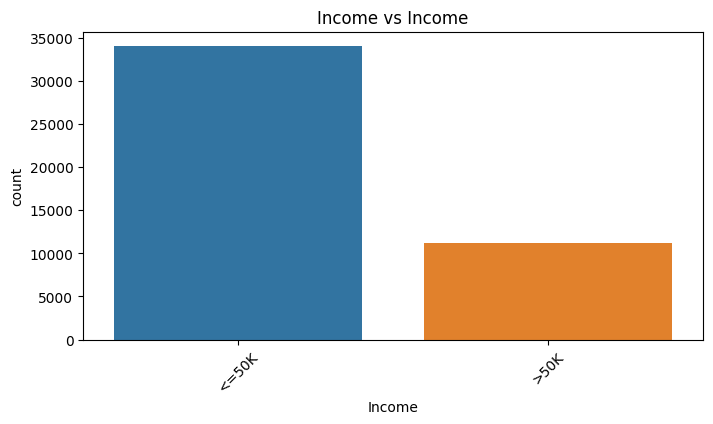

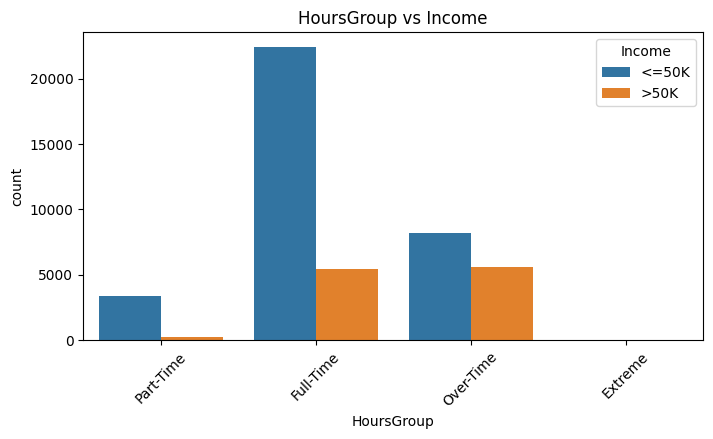

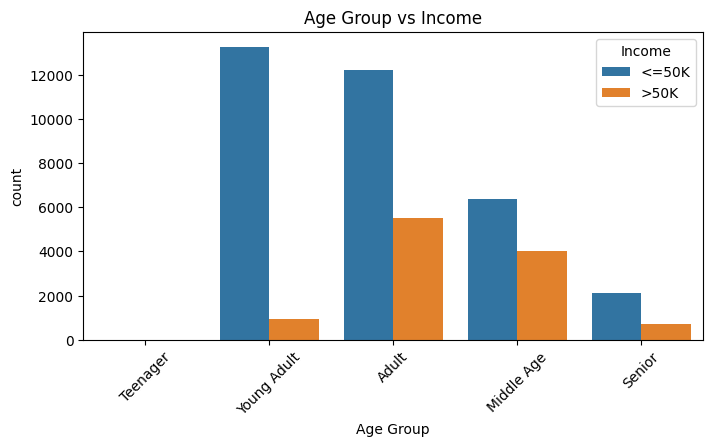

In [ ]:
#bivariate numerik vs income
cat_col = ['Workclass',  'Marital Status', 'Occupation', 'Relationship', 'Race',	'Gender',	'Income', 'HoursGroup', 'Age Group']

for col in cat_col:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_cp, x=col, hue='Income')
    plt.title(f'{col} vs Income')
    plt.xticks(rotation=45)
    plt.show()

#Encoding

In [ ]:
df_cp

,Workclass,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Income,HoursGroup,Age Group
0,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,<=50K,Full-Time,Adult
1,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,<=50K,Part-Time,Middle Age
2,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,<=50K,Full-Time,Adult
3,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,<=50K,Full-Time,Middle Age
4,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,<=50K,Full-Time,Young Adult
...,...,...,...,...,...,...,...,...,...,...
16274,Private,13,Never-married,Prof-specialty,Own-child,White,Male,<=50K,Full-Time,Adult
16275,Private,13,Divorced,Prof-specialty,Not-in-family,White,Female,<=50K,Full-Time,Adult
16277,Private,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,<=50K,Over-Time,Adult
16278,Private,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,<=50K,Full-Time,Adult


In [ ]:
#Label Encoding the categorical column

cat_col = ['Workclass',  'Marital Status', 'Occupation', 'Relationship', 'Race',	'Gender', 'HoursGroup', 'Age Group']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Loop through each categorical column and apply LabelEncoder
for col in cat_col:
    df_cp[col] = le.fit_transform(df_cp[col])

In [ ]:
df_cp.head()

,Workclass,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Income,HoursGroup,Age Group
0,5,13,4,0,1,4,1,<=50K,0,0
1,4,13,2,3,0,4,1,<=50K,2,1
2,2,9,0,5,1,4,1,<=50K,0,0
3,2,7,2,5,0,2,1,<=50K,0,1
4,2,13,2,9,5,2,0,<=50K,0,3


In [ ]:
#One Hot Encoding the "income" column

df_cp = pd.get_dummies(df_cp, columns=["Income"], dtype=int)
df_cp.head()

,Workclass,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,HoursGroup,Age Group,Income_<=50K,Income_>50K
0,5,13,4,0,1,4,1,0,0,1,0
1,4,13,2,3,0,4,1,2,1,1,0
2,2,9,0,5,1,4,1,0,0,1,0
3,2,7,2,5,0,2,1,0,1,1,0
4,2,13,2,9,5,2,0,0,3,1,0


In [ ]:
df_cp

,Workclass,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,HoursGroup,Age Group,Income_<=50K,Income_>50K
0,5,13,4,0,1,4,1,0,0,1,0
1,4,13,2,3,0,4,1,2,1,1,0
2,2,9,0,5,1,4,1,0,0,1,0
3,2,7,2,5,0,2,1,0,1,1,0
4,2,13,2,9,5,2,0,0,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...
16274,2,13,4,9,3,4,1,0,0,1,0
16275,2,13,0,9,1,4,0,0,0,1,0
16277,2,13,2,9,0,4,1,1,0,1,0
16278,2,13,0,0,3,1,1,0,0,1,0


#Split data

In [ ]:
target = df_cp[['Income_>50K']]  # Target (gunakan salah satu kolom saja)
df_cp = df_cp.drop(columns=['Income_>50K', 'Income_<=50K'])  # Fitur

In [ ]:
from sklearn.model_selection import train_test_split # imports the function

X_train, X_test, y_train, y_test = train_test_split(df_cp, target,
                                                    stratify=target, # supaya ratio value di data training dan test sama
                                                    test_size = 0.3,
                                                    random_state = 0)

In [ ]:
print("Dimensi X_train dataset: ", X_train.shape)
print("Dimensi y_train dataset: ", y_train.shape)
print("Dimensi X_test dataset: ", X_test.shape)
print("Dimensi y_test dataset: ", y_test.shape)

Dimensi X_train dataset:  (31635, 9)
Dimensi y_train dataset:  (31635, 1)
Dimensi X_test dataset:  (13558, 9)
Dimensi y_test dataset:  (13558, 1)


#feature scaling

In [ ]:
X_train

,Workclass,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,HoursGroup,Age Group
16681,4,6,2,4,0,4,1,0,0
12155,2,10,4,2,1,4,1,0,0
20742,4,13,2,13,0,4,1,1,2
20564,5,13,4,0,3,2,0,0,3
5684,1,10,4,10,4,2,0,0,0
...,...,...,...,...,...,...,...,...,...
24145,2,10,4,11,3,3,0,2,3
18965,2,10,0,12,1,4,0,1,0
22579,2,10,0,0,4,4,0,0,0
1168,4,14,2,9,0,4,1,0,2


In [ ]:
from sklearn.preprocessing import RobustScaler
sc_X = RobustScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

In [ ]:
pd.DataFrame(X_train)

,Workclass,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,HoursGroup,Age Group
16681,2.0,-1.00,0.0,-0.285714,-0.333333,0.0,0.0,0.0,-0.333333
12155,0.0,0.00,1.0,-0.571429,0.000000,0.0,0.0,0.0,-0.333333
20742,2.0,0.75,0.0,1.000000,-0.333333,0.0,0.0,1.0,0.333333
20564,3.0,0.75,1.0,-0.857143,0.666667,-2.0,-1.0,0.0,0.666667
5684,-1.0,0.00,1.0,0.571429,1.000000,-2.0,-1.0,0.0,-0.333333
...,...,...,...,...,...,...,...,...,...
24145,0.0,0.00,1.0,0.714286,0.666667,-1.0,-1.0,2.0,0.666667
18965,0.0,0.00,-1.0,0.857143,0.000000,0.0,-1.0,1.0,-0.333333
22579,0.0,0.00,-1.0,-0.857143,1.000000,0.0,-1.0,0.0,-0.333333
1168,2.0,1.00,0.0,0.428571,-0.333333,0.0,0.0,0.0,0.333333


#modelling

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder


In [ ]:
# Membuat model
svm_model = SVC()
knn_model = KNeighborsClassifier()
lr_model = LogisticRegression(max_iter=1000)  # Menambahkan max_iter untuk mengatasi potensi peringatan konvergensi
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()

# Melatih model dengan data training
svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Memprediksi label dengan data testing
svm_pred = svm_model.predict(X_test)
knn_pred = knn_model.predict(X_test)
lr_pred = lr_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)

# Evaluasi model
def evaluate_model(y_true, y_pred, model_name):
  print(f"Evaluasi Model {model_name}:")
  print(f"Accuracy: {accuracy_score(y_true, y_pred)}")
  print(classification_report(y_true, y_pred))
  print("-" * 30)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using rave

In [ ]:
evaluate_model(y_test, svm_pred, "SVM")
evaluate_model(y_test, knn_pred, "KNN")
evaluate_model(y_test, lr_pred, "Logistic Regression")
evaluate_model(y_test, dt_pred, "Decision Tree")
evaluate_model(y_test, rf_pred, "Random Forest")
evaluate_model(y_test, gb_pred, "Gradient Boosting")

Evaluasi Model SVM:
Accuracy: 0.8251216993656881
              precision    recall  f1-score   support

           0       0.84      0.94      0.89     10196
           1       0.73      0.47      0.57      3362

    accuracy                           0.83     13558
   macro avg       0.79      0.71      0.73     13558
weighted avg       0.81      0.83      0.81     13558

------------------------------
Evaluasi Model KNN:
Accuracy: 0.8160495648325712
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     10196
           1       0.64      0.58      0.61      3362

    accuracy                           0.82     13558
   macro avg       0.75      0.74      0.74     13558
weighted avg       0.81      0.82      0.81     13558

------------------------------
Evaluasi Model Logistic Regression:
Accuracy: 0.8002655258887742
              precision    recall  f1-score   support

           0       0.83      0.93      0.87     10196
           1

In [ ]:
#melihat akurasi setiap model dalam satu output

models = [svm_model, knn_model, lr_model, dt_model, rf_model, gb_model]
model_names = ["SVM", "KNN", "Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosting"]
predictions = [svm_pred, knn_pred, lr_pred, dt_pred, rf_pred, gb_pred]

for model, model_name, pred in zip(models, model_names, predictions):
  accuracy = accuracy_score(y_test, pred)
  print(f"Model {model_name}: Accuracy = {accuracy}")


Model SVM: Accuracy = 0.8251216993656881
Model KNN: Accuracy = 0.8160495648325712
Model Logistic Regression: Accuracy = 0.8002655258887742
Model Decision Tree: Accuracy = 0.8106652898657619
Model Random Forest: Accuracy = 0.8223189260952943
Model Gradient Boosting: Accuracy = 0.8341938338988051


In [ ]:
# Memprediksi label dengan data training
svm_pred_train = svm_model.predict(X_train)
knn_pred_train = knn_model.predict(X_train)
lr_pred_train = lr_model.predict(X_train)
dt_pred_train = dt_model.predict(X_train)
rf_pred_train = rf_model.predict(X_train)
gb_pred_train = gb_model.predict(X_train)


models = [svm_model, knn_model, lr_model, dt_model, rf_model, gb_model]
model_names = ["SVM", "KNN", "Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosting"]
predictions_test = [svm_pred, knn_pred, lr_pred, dt_pred, rf_pred, gb_pred]
predictions_train = [svm_pred_train, knn_pred_train, lr_pred_train, dt_pred_train, rf_pred_train, gb_pred_train]

for model, model_name, pred_test, pred_train in zip(models, model_names, predictions_test, predictions_train):
  accuracy_test = accuracy_score(y_test, pred_test)
  accuracy_train = accuracy_score(y_train, pred_train)
  print(f"Model {model_name}: Accuracy (Test) = {accuracy_test}, Accuracy (Train) = {accuracy_train}")


Model SVM: Accuracy (Test) = 0.8251216993656881, Accuracy (Train) = 0.8220957799905169
Model KNN: Accuracy (Test) = 0.8160495648325712, Accuracy (Train) = 0.8452347083926032
Model Logistic Regression: Accuracy (Test) = 0.8002655258887742, Accuracy (Train) = 0.7981981981981981
Model Decision Tree: Accuracy (Test) = 0.8106652898657619, Accuracy (Train) = 0.8814287972182709
Model Random Forest: Accuracy (Test) = 0.8223189260952943, Accuracy (Train) = 0.8814287972182709
Model Gradient Boosting: Accuracy (Test) = 0.8341938338988051, Accuracy (Train) = 0.8338549075391181


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np

def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')  # 'weighted' untuk multi-class
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # Menghitung F2 Score
    beta = 2
    f2_score = (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall) if (precision + recall) > 0 else 0

    # Menghitung ROC-AUC jika y_true adalah biner
    roc_auc = roc_auc_score(y_true, y_pred) if len(np.unique(y_true)) == 2 else None

    print(f"Evaluasi Model {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"F2 Score: {f2_score:.4f}")
    if roc_auc is not None:
        print(f"ROC-AUC: {roc_auc:.4f}")
    print("-" * 30)

# Contoh pemanggilan fungsi untuk setiap model
evaluate_model(y_test, svm_pred, "SVM")
evaluate_model(y_test, knn_pred, "KNN")
evaluate_model(y_test, lr_pred, "Logistic Regression")
evaluate_model(y_test, dt_pred, "Decision Tree")
evaluate_model(y_test, rf_pred, "Random Forest")
evaluate_model(y_test, gb_pred, "Gradient Boosting")


Evaluasi Model SVM:
Accuracy: 0.8251
Precision: 0.8149
Recall: 0.8251
F1 Score: 0.8115
F2 Score: 0.8231
ROC-AUC: 0.7074
------------------------------
Evaluasi Model KNN:
Accuracy: 0.8160
Precision: 0.8105
Recall: 0.8160
F1 Score: 0.8127
F2 Score: 0.8149
ROC-AUC: 0.7365
------------------------------
Evaluasi Model Logistic Regression:
Accuracy: 0.8003
Precision: 0.7845
Recall: 0.8003
F1 Score: 0.7837
F2 Score: 0.7971
ROC-AUC: 0.6712
------------------------------
Evaluasi Model Decision Tree:
Accuracy: 0.8107
Precision: 0.8056
Recall: 0.8107
F1 Score: 0.8077
F2 Score: 0.8097
ROC-AUC: 0.7317
------------------------------
Evaluasi Model Random Forest:
Accuracy: 0.8223
Precision: 0.8177
Recall: 0.8223
F1 Score: 0.8196
F2 Score: 0.8214
ROC-AUC: 0.7475
------------------------------
Evaluasi Model Gradient Boosting:
Accuracy: 0.8342
Precision: 0.8263
Recall: 0.8342
F1 Score: 0.8275
F2 Score: 0.8326
ROC-AUC: 0.7437
------------------------------


In [ ]:
model_gb = gb_model.fit(X_train, y_train) #training model dari dataset yang suda disiapkan

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred_train = model_gb.predict(X_train)
y_pred_test = model_gb.predict(X_test)

In [ ]:
print('training accuracy: ', accuracy_score(y_train, y_pred_train))
print('testing accuracy: ', accuracy_score(y_test, y_pred_test))

In [ ]:
import pickle
pickle.dump(model_gb, open('model_gb.pkl', 'wb'))

#membuat Backend API menggunakan framework flask

In [ ]:
from google.colab import files

# Download the pickle file
files.download('model_gb.pkl')